In [ ]:
# 구글 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 데이터 불러오기
import pandas as pd
import numpy as np
train = pd.read_csv('/content/drive/MyDrive/Dacon/Dacon5/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Dacon/Dacon5/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/Dacon/Dacon5/sample_submission.csv')

In [ ]:
# info 확인
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6255 entries, 0 to 6254
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            6255 non-null   int64  
 1   Store         6255 non-null   int64  
 2   Date          6255 non-null   object 
 3   Temperature   6255 non-null   float64
 4   Fuel_Price    6255 non-null   float64
 5   Promotion1    2102 non-null   float64
 6   Promotion2    1592 non-null   float64
 7   Promotion3    1885 non-null   float64
 8   Promotion4    1819 non-null   float64
 9   Promotion5    2115 non-null   float64
 10  Unemployment  6255 non-null   float64
 11  IsHoliday     6255 non-null   bool   
 12  Weekly_Sales  6255 non-null   float64
dtypes: bool(1), float64(9), int64(2), object(1)
memory usage: 592.6+ KB
None


In [ ]:
# train 확인

# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
train

,id,Store,Date,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,IsHoliday,Weekly_Sales
0,1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,8.106,False,1643690.90
1,2,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,8.106,True,1641957.44
2,3,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,8.106,False,1611968.17
3,4,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,8.106,False,1409727.59
4,5,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,8.106,False,1554806.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250,6251,45,31/08/2012,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,8.684,False,734297.87
6251,6252,45,07/09/2012,75.70,3.911,11024.45,12.80,52.63,1854.77,2055.70,8.684,True,766512.66
6252,6253,45,14/09/2012,67.87,3.948,11407.95,NaN,4.30,3421.72,5268.92,8.684,False,702238.27
6253,6254,45,21/09/2012,65.32,4.038,8452.20,92.28,63.24,2376.38,8670.40,8.684,False,723086.20


In [ ]:
# train describe 확인
train.describe()

,id,Store,Temperature,Fuel_Price,Promotion1,Promotion2,Promotion3,Promotion4,Promotion5,Unemployment,Weekly_Sales
count,6255.000000,6255.000000,6255.000000,6255.000000,2102.000000,1592.000000,1885.000000,1819.000000,2115.000000,6255.000000,6.255000e+03
mean,3128.000000,23.000000,60.639199,3.344369,7155.930661,3308.125810,1462.535523,3465.952501,4518.993173,8.029236,1.047619e+06
std,1805.807299,12.988211,18.624094,0.455364,8408.206085,9382.823804,9667.580258,6413.116294,6048.661908,1.874875,5.654362e+05
min,1.000000,1.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.410000,135.160000,4.077000,2.099862e+05
25%,1564.500000,12.000000,47.170000,2.917000,1844.295000,39.755000,4.700000,499.895000,1742.305000,6.916500,5.538695e+05
50%,3128.000000,23.000000,62.720000,3.413000,5221.140000,205.410000,24.600000,1532.630000,3226.410000,7.906000,9.604761e+05
75%,4691.500000,34.000000,75.220000,3.722000,9199.242500,1931.005000,104.010000,3640.905000,5444.030000,8.622000,1.421209e+06
max,6255.000000,45.000000,100.140000,4.308000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,14.313000,3.818686e+06


In [ ]:
# Promotion1 ~ Promotion5 값 중 음수인 것을 0으로 바꾸기
list_promotion = ['Promotion1',	'Promotion2', 'Promotion3',	'Promotion4', 'Promotion5']
for i in list_promotion:
    train.loc[train[i] < 0, i] = 0
    test.loc[test[i] < 0, i] = 0

In [ ]:
# Promotion1 ~ Promotion5의 결측값을 0으로 대체
train[list_promotion] = train[list_promotion].fillna(0)
test[list_promotion] = test[list_promotion].fillna(0)

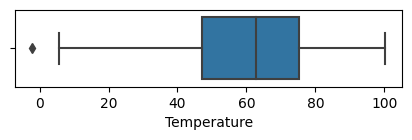

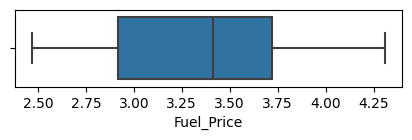

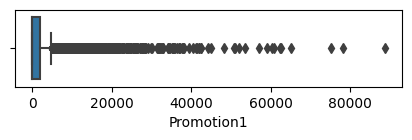

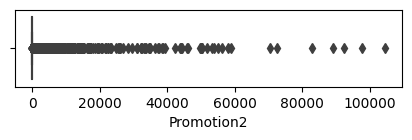

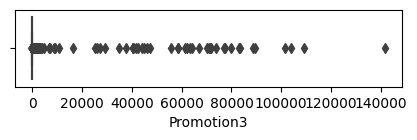

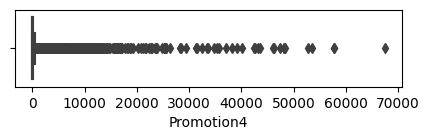

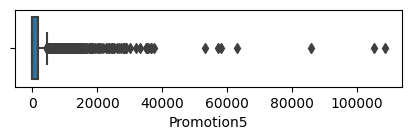

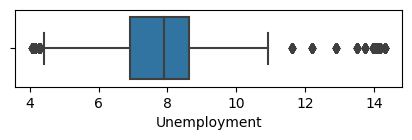

In [ ]:
# train 데이터의 이상값 파악을 위한 시각화
list1 = ['Temperature', 'Fuel_Price', 'Promotion1', 'Promotion2', 'Promotion3', 'Promotion4', 'Promotion5', 'Unemployment']
import matplotlib.pyplot as plt
import seaborn as sns
for i in list1:
    fig = plt.figure(figsize = (5, 1))
    sns.boxplot(data = train, x = i)
    plt.show()

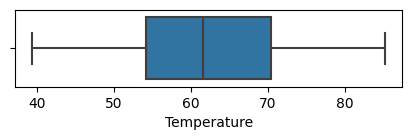

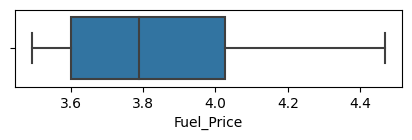

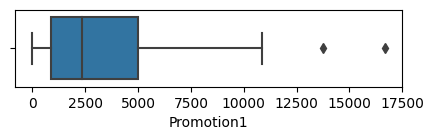

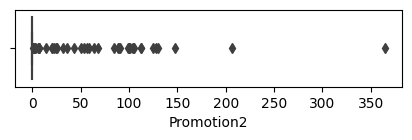

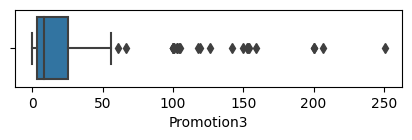

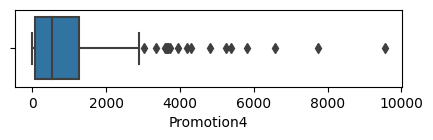

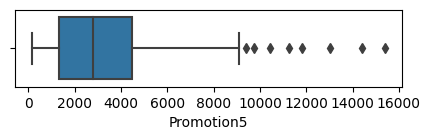

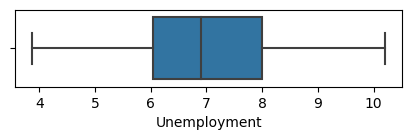

In [ ]:
# test 데이터의 이상값 파악을 위한 시각화
list1 = ['Temperature', 'Fuel_Price', 'Promotion1', 'Promotion2', 'Promotion3', 'Promotion4', 'Promotion5', 'Unemployment']
import matplotlib.pyplot as plt
import seaborn as sns
for i in list1:
    fig = plt.figure(figsize = (5, 1))
    sns.boxplot(data = test, x = i)
    plt.show()

In [ ]:
# train 데이터 이상값 대치
out_list_tr = ['Temperature', 'Promotion1', 'Promotion2', 'Promotion3', 'Promotion4', 'Promotion5', 'Unemployment']

def get_outlier(df = None, column = None):
    fraud = df[column]
    quantile25 = fraud.quantile(q = 0.25)
    quantile75 = fraud.quantile(q = 0.75)
    iqr = quantile75 - quantile25
    lowest_val = quantile25 - (1.5 * iqr)
    highest_val = quantile75 + (1.5 * iqr)
    low_outlier_index = fraud[fraud < lowest_val].index
    hight_outlier_index = fraud[fraud > highest_val].index
    return lowest_val, highest_val, low_outlier_index, hight_outlier_index

# 상한값을 초과하는 값은 상한값으로, 하한값보다 작은 값은 하한값으로 대치
for i in out_list_tr:
    lv, hv, li, hi = get_outlier(df = train, column = i)
    hl = hi.tolist()
    ll = li.tolist()
    train.loc[hl, i] = hv
    train.loc[ll, i] = lv
    print(i, hv, lv)

Temperature 117.29499999999999 5.095000000000006
Promotion1 4791.5 -2874.8999999999996
Promotion2 0.25 -0.15000000000000002
Promotion3 6.9875 -4.1925
Promotion4 477.77500000000003 -286.665
Promotion5 4482.0625 -2689.2375
Unemployment 11.18025 4.35825


In [ ]:
# test 데이터 이상값 대치
out_list_ts = ['Promotion1', 'Promotion2', 'Promotion3', 'Promotion4', 'Promotion5']

def get_outlier(df = None, column = None):
    fraud = df[column]
    quantile25 = fraud.quantile(q = 0.25)
    quantile75 = fraud.quantile(q = 0.75)
    iqr = quantile75 - quantile25
    lowest_val = quantile25 - (1.5 * iqr)
    highest_val = quantile75 + (1.5 * iqr)
    low_outlier_index = fraud[fraud < lowest_val].index
    hight_outlier_index = fraud[fraud > highest_val].index
    return lowest_val, highest_val, low_outlier_index, hight_outlier_index

# 상한값을 초과하는 값은 상한값으로, 하한값보다 작은 값은 하한값으로 대치
for i in out_list_ts:
    lv, hv, li, hi = get_outlier(df = test, column = i)
    hl = hi.tolist()
    ll = li.tolist()
    test.loc[hl, i] = hv
    test.loc[ll, i] = lv
    print(i, hv, lv)

Promotion1 11169.80375 -5301.06625
Promotion2 0.0 0.0
Promotion3 58.7625 -30.3775
Promotion4 3006.8525 -1677.7675000000002
Promotion5 9212.83125 -3430.41875


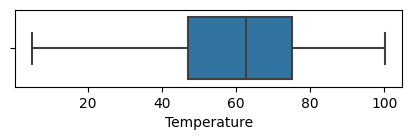

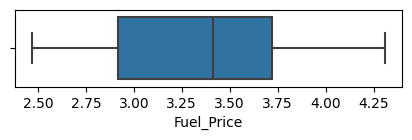

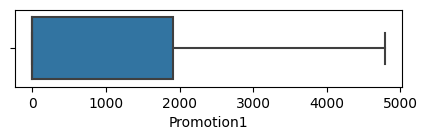

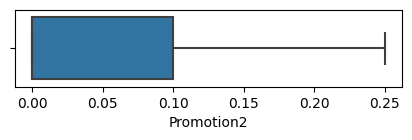

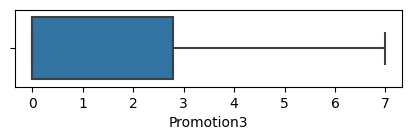

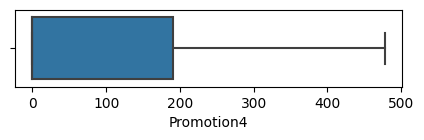

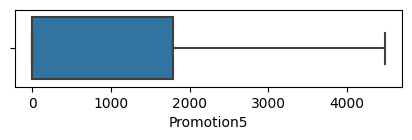

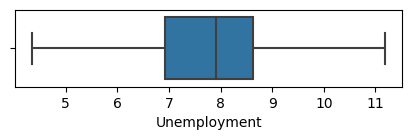

In [ ]:
# train 데이터 이상값 대치 후 시각화
list1 = ['Temperature', 'Fuel_Price', 'Promotion1', 'Promotion2', 'Promotion3', 'Promotion4', 'Promotion5', 'Unemployment']
import matplotlib.pyplot as plt
import seaborn as sns
for i in list1:
    fig = plt.figure(figsize=(5, 1))
    sns.boxplot(data = train, x = i)
    plt.show()

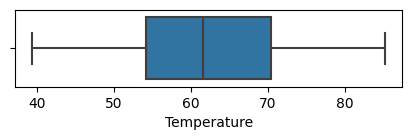

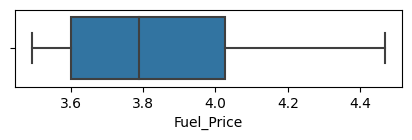

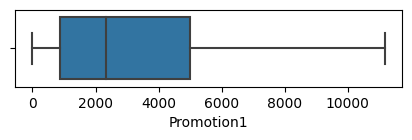

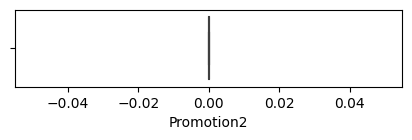

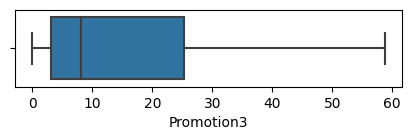

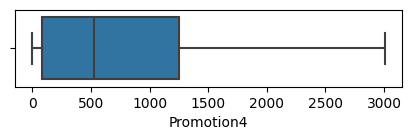

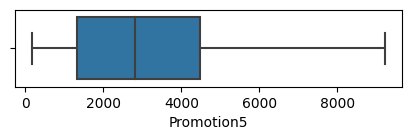

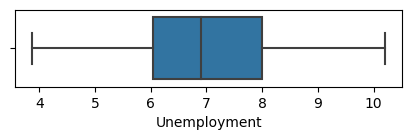

In [ ]:
# test 데이터 이상값 대치 후 시각화
list1 = ['Temperature', 'Fuel_Price', 'Promotion1', 'Promotion2', 'Promotion3', 'Promotion4', 'Promotion5', 'Unemployment']
import matplotlib.pyplot as plt
import seaborn as sns
for i in list1:
    fig = plt.figure(figsize=(5, 1))
    sns.boxplot(data = test, x = i)
    plt.show()

In [ ]:
# IsHoliday의 타입을 int 형으로 바꿈
train.IsHoliday = train.IsHoliday.astype(int)
test.IsHoliday = test.IsHoliday.astype(int)

In [ ]:
# Date의 타입을 datetime 형태로 바꿔준 후 Year, Month, Week, Day라는 파생변수 생성

train['Date'] =  pd.to_datetime(train['Date'], format = '%d/%m/%Y')
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['Week'] = train['Date'].dt.isocalendar().week
train['Day'] = train['Date'].dt.day

test['Date'] = pd.to_datetime(test['Date'], format = '%d/%m/%Y')
test['Year'] = test['Date'].dt.year
test['Month'] = test['Date'].dt.month
test['Week'] = test['Date'].dt.isocalendar().week
test['Day'] = test['Date'].dt.day

In [ ]:
# *** 고득점자 코드 참조 ***
# 각 Store별 1월 ~ 10월의 주간 판매량을 time_series_df에 넣고 행과 열을 전치하여 행이 Store1 ~ Store45가 되게 함
time_series_df = pd.DataFrame()
for num in range(1, 46) :
    col_name = "Store " + str(num)
    # test 셋은 2012년 10월 데이터이기 때문에 각 연도별 10월(포함) 이전의 시계열 데이터의 유사성을 판단하여 type을 나누었습니다.
    time_series = train[(train.Store==num) & (train.Month <= 10)]['Weekly_Sales'].values
    time_series_df[col_name] = time_series
transpose_time_series_df = time_series_df.transpose()

In [ ]:
# *** 고득점자 코드 참조 ***
# tslearn 설치
!pip install tslearn

In [ ]:
# *** 고득점자 코드 참조 ***
# 시계열 K 평균 군집을 이용해서 각 Store의 1월 ~ 10월의 시계열 유사성을 판단하여 3개의 군집으로 나누어줌

import tslearn
from tslearn.clustering import TimeSeriesKMeans, silhouette_score
kmeans = TimeSeriesKMeans(n_clusters = 3, metric='dtw', max_iter = 300, init='k-means++', random_state = 0).fit(transpose_time_series_df)
# dtw(dinamic time warping) or (default)euclidean
# dtw 무게 중심 계산, 두 시계열 데이터의 유사도 비교

transpose_time_series_df['cluster'] = kmeans.labels_

average_score = silhouette_score(transpose_time_series_df, transpose_time_series_df['cluster'])
print(average_score)

0.6213191585112997


In [ ]:
# *** 고득점자 코드 참조 ***
# 시계열 K 평균 군집을 이용해서 학습과 예측 후 군집별 list를 생성해서 예측값의 순서(i)를 append 해줌.
# 그 다음 (0, 1, 2)번 군집에 속하는 Store면 그 Store의 Type 열을 (0, 1, 2)로 채움

prediction = kmeans.fit_predict(transpose_time_series_df)

list_0 = []
list_1 = []
list_2 = []

for i in range(len(prediction)) :
    if prediction[i] == 0 :
        list_0.append(i+1)
    elif prediction[i] == 1 :
        list_1.append(i+1)
    else:
        list_2.append(i+1)

print("Clustering 0 : ", list_0)
print("Clustering 1 : ", list_1)
print("Clustering 2 : ", list_2)

for i in range(len(prediction)) :
    if prediction[i] == 0 :
        train.loc[(train.Store == i + 1), 'Type'] = 0
        test.loc[(test.Store == i + 1), 'Type'] = 0
    elif prediction[i] == 1 :
        train.loc[(train.Store == i + 1), 'Type'] = 1
        test.loc[(test.Store == i + 1), 'Type'] = 1
    else:
        train.loc[(train.Store == i + 1), 'Type'] = 2
        test.loc[(test.Store == i + 1), 'Type'] = 2

Clustering 0 :  [3, 5, 7, 9, 15, 16, 21, 25, 29, 30, 33, 36, 37, 38, 42, 43, 44, 45]
Clustering 1 :  [1, 6, 8, 11, 12, 17, 18, 19, 22, 23, 24, 26, 28, 31, 32, 34, 35, 39, 40, 41]
Clustering 2 :  [2, 4, 10, 13, 14, 20, 27]


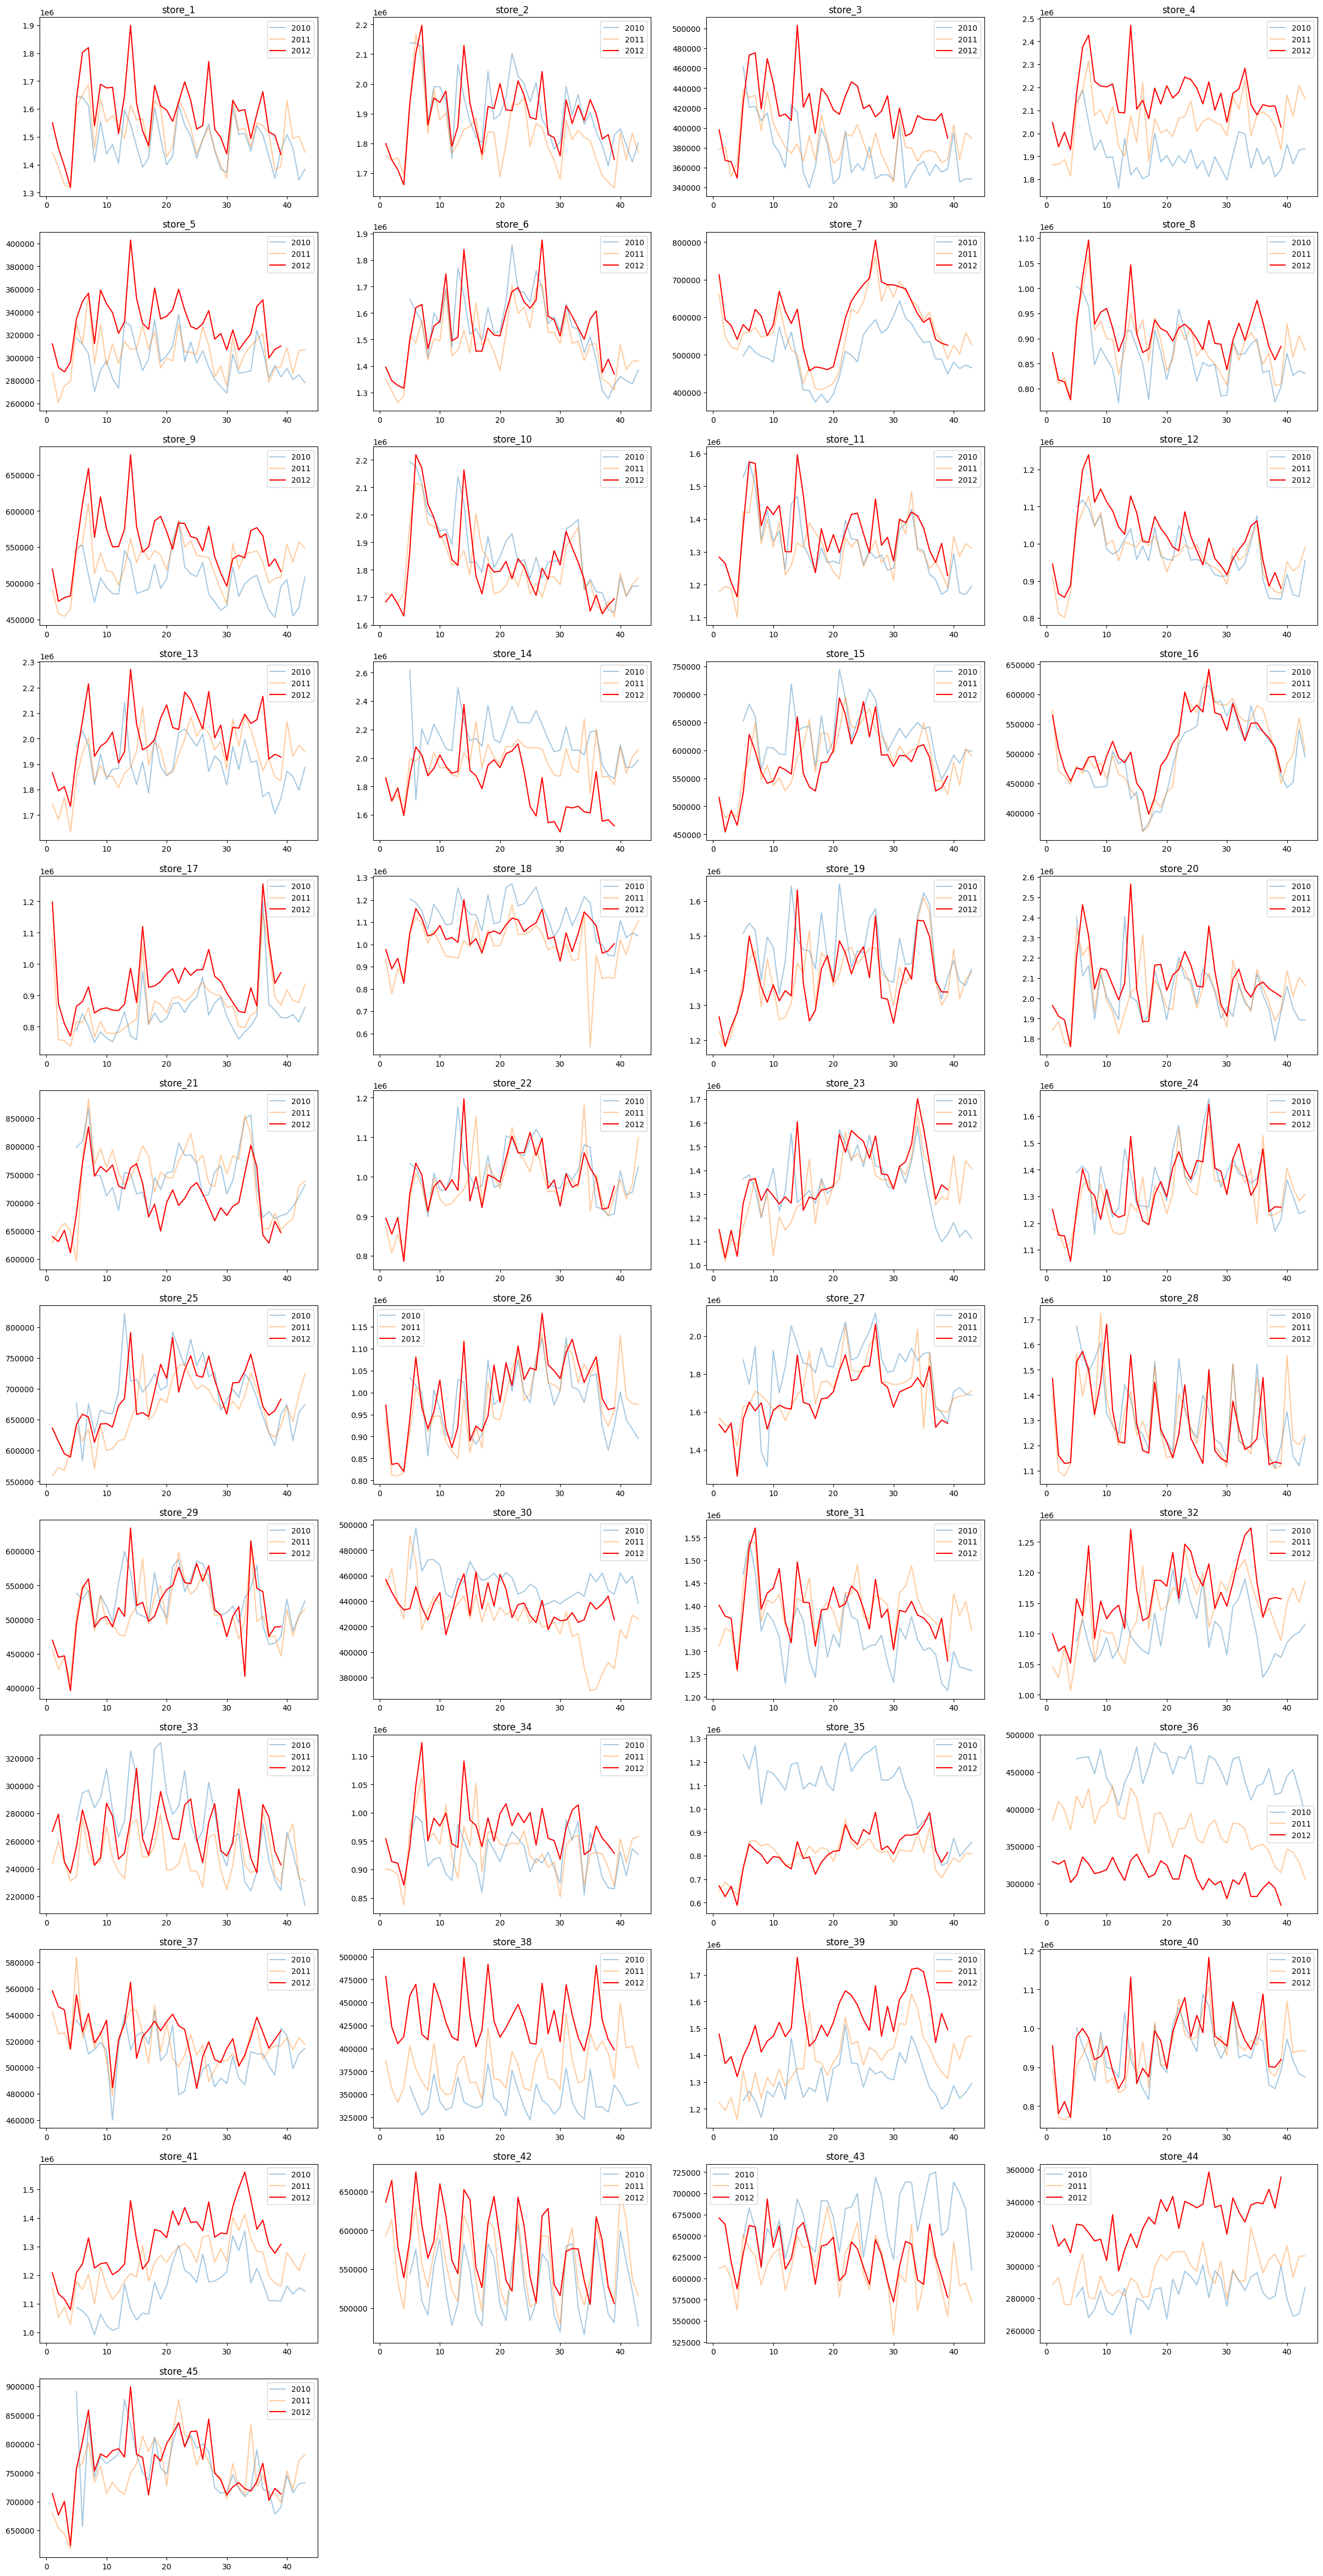

In [ ]:
# *** 다른 참가자 코드 참조 ***
# 각 Store의 2010년 ~ 2012년의 1월 ~ 10월 주간 판매량 시각화

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(30,60))
train_df = train
for store in range(1,46):
    storeset = train_df[train_df.Store==store]
    storeset_2010 = storeset[(storeset.Year==2010) & (storeset.Week<=43)]
    storeset_2011 = storeset[(storeset.Year==2011) & (storeset.Week<=43)]
    storeset_2012 = storeset[(storeset.Year==2012) & (storeset.Week<=43)]

    ax = fig.add_subplot(12, 4, store)

    plt.title(f"store_{store}")
    ax.plot(storeset_2010.Week.sort_values(), storeset_2010.Weekly_Sales, label="2010", alpha=0.4)
    ax.plot(storeset_2011.Week.sort_values(), storeset_2011.Weekly_Sales, label="2011", alpha=0.4)
    ax.plot(storeset_2012.Week.sort_values(), storeset_2012.Weekly_Sales, label="2012", color='r')
    #ax.plot(test_pred_store.Week, test_pred_store.Before_Weekly_Sales, label="2012-pred", color='b')
    ax.legend()

plt.show()

<ipython-input-46-113d44b0633d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = train.corr()


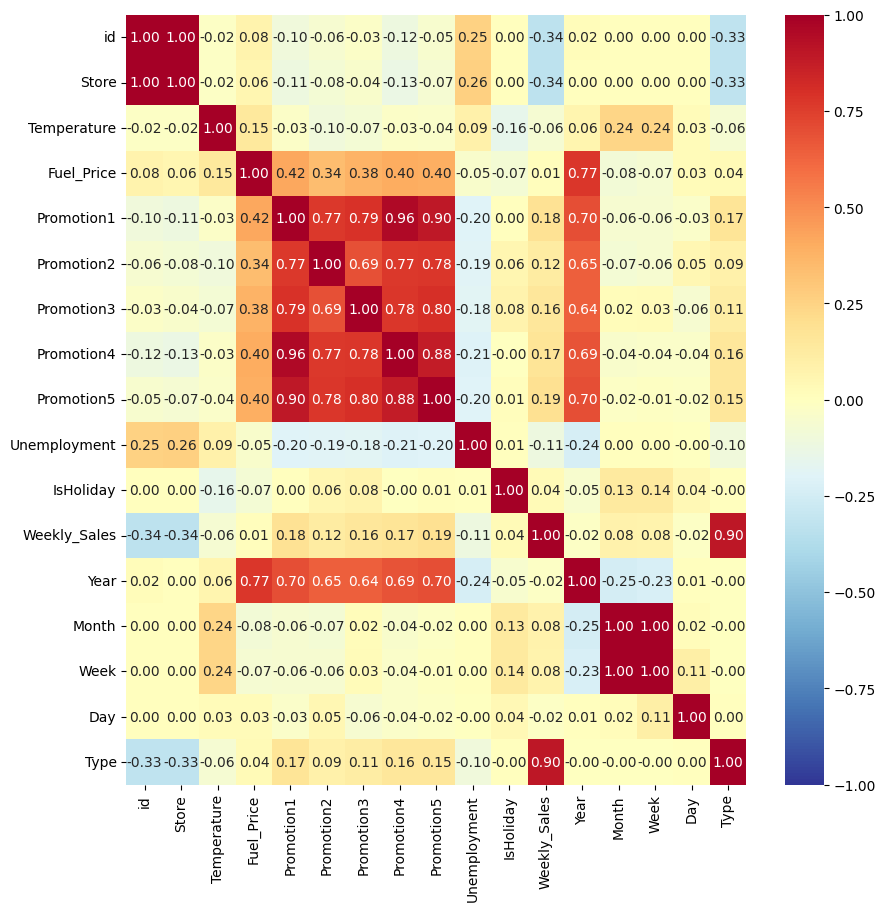

In [ ]:
# heatmap을 통한 상관관계 시각화
import matplotlib.pyplot as plt
import seaborn as sns
cor = train.corr()
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(cor,
            cmap = 'RdYlBu_r',
            annot = True,   # 실제 값을 표시한다
            fmt = '.2f',
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )
plt.show()

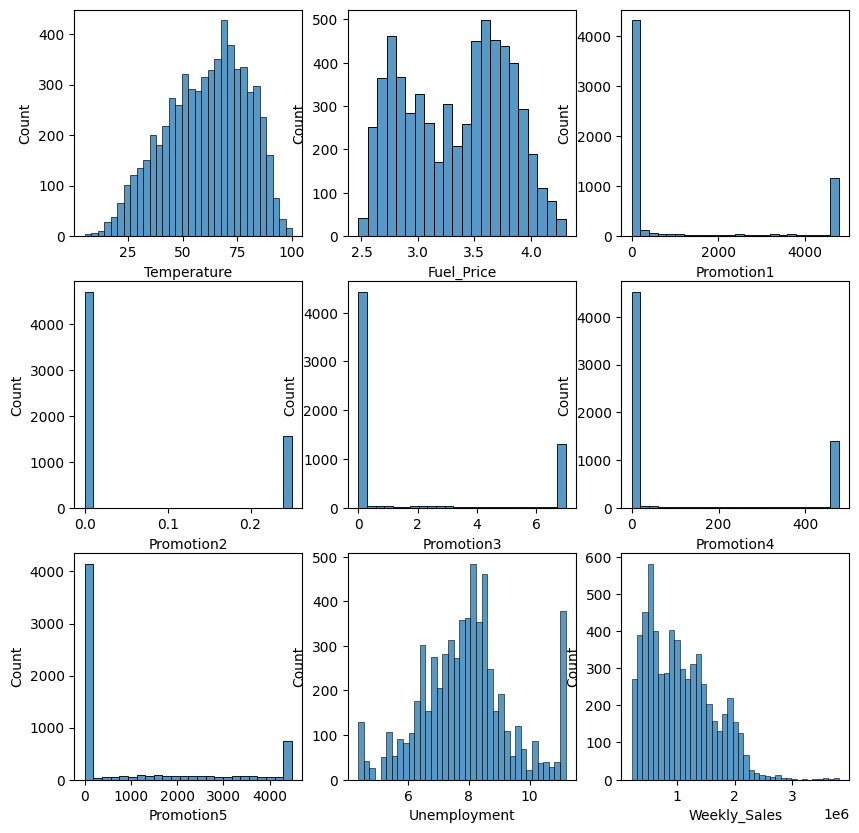

In [ ]:
# histplot을 이용한 각 열의 분포 파악

import matplotlib.pyplot as plt
import seaborn as sns

list2 = ['Temperature', 'Fuel_Price', 'Promotion1', 'Promotion2', 'Promotion3', 'Promotion4', 'Promotion5', 'Unemployment', 'Weekly_Sales']

fig, ax = plt.subplots(ncols = 3, nrows = 3, figsize = (10, 10))

for i, col in enumerate(train[list2]):
    sns.histplot(train[col], ax = ax[int(i / 3), int(i % 3)])

In [ ]:
# 필요 없는 열 제거
train = train.drop(['id', 'Date', 'Temperature', 'Fuel_Price', 'Promotion1', 'Promotion2', 'Promotion3', 'Promotion4', 'Promotion5', 'Unemployment'], axis = 1)
test = test.drop(['id', 'Date', 'Temperature', 'Fuel_Price', 'Promotion1', 'Promotion2', 'Promotion3', 'Promotion4', 'Promotion5', 'Unemployment'], axis = 1)

In [ ]:
# 학습 전 종속변수인 Weekly_Sales는 로그 변환, 독립변수는 MinMaxScaler를 이용한 정규화

train_ts = train.copy()
tr_col_scaler = ['Store', 'IsHoliday', 'Year', 'Month', 'Week', 'Day', 'Type']

train['Weekly_Sales'] = np.log1p(train['Weekly_Sales'])

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train[tr_col_scaler] = scaler.fit_transform(train[tr_col_scaler])

ts_col = ['Store', 'IsHoliday', 'Year', 'Month', 'Week', 'Day', 'Type']
scaler.fit(train_ts[ts_col])
test = scaler.transform(test)

In [ ]:
# MinMaxScaler 적용 후 array 형태로 바뀌어서 DataFrame 형태로 만들기
test = pd.DataFrame(test, columns = ts_col)

In [ ]:
# catboost, pycaret, markupsafe 설치
!pip install catboost
!pip install pycaret
!pip install markupsafe

In [ ]:
# pycaret 환경 설정

import pycaret
import jinja2

from pycaret.regression import *
setup_reg = setup(data = train, target = 'Weekly_Sales', session_id = 0)

,Description,Value
0,Session id,0
1,Target,Weekly_Sales
2,Target type,Regression
3,Original data shape,"(6255, 8)"
4,Transformed data shape,"(6255, 8)"
5,Transformed train set shape,"(4378, 8)"
6,Transformed test set shape,"(1877, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# 모델 별 성능 비교
top_model = compare_models(round=4, sort='RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,0.0366,0.0027,0.0520,0.9920,0.0036,0.0027,0.7800
catboost,CatBoost Regressor,0.0400,0.0030,0.0548,0.9912,0.0037,0.0029,1.8250
lightgbm,Light Gradient Boosting Machine,0.0466,0.0042,0.0642,0.9879,0.0044,0.0034,0.3160
rf,Random Forest Regressor,0.0445,0.0043,0.0655,0.9874,0.0044,0.0032,1.4780
et,Extra Trees Regressor,0.0515,0.0062,0.0784,0.9820,0.0053,0.0037,1.3300
dt,Decision Tree Regressor,0.0561,0.0069,0.0827,0.9801,0.0056,0.0041,0.1150
gbr,Gradient Boosting Regressor,0.0864,0.0123,0.1106,0.9640,0.0076,0.0063,0.5720
ada,AdaBoost Regressor,0.1759,0.0460,0.2142,0.8663,0.0148,0.0129,0.2890
knn,K Neighbors Regressor,0.1889,0.0584,0.2415,0.8299,0.0168,0.0140,0.1180
br,Bayesian Ridge,0.2237,0.0777,0.2786,0.7742,0.0193,0.0165,0.1540


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [ ]:
# 성능 좋은 4가지 모델 생성
xgb = create_model('xgboost')
catb = create_model('catboost')
lgb = create_model('lightgbm')
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0362,0.0027,0.0517,0.9922,0.0035,0.0026
1,0.0387,0.0033,0.0574,0.9893,0.0039,0.0028
2,0.0364,0.0024,0.0491,0.9936,0.0034,0.0027
3,0.0369,0.0035,0.0593,0.9898,0.0041,0.0027
4,0.0368,0.0024,0.0494,0.9932,0.0034,0.0027
5,0.0384,0.0031,0.0554,0.9909,0.0038,0.0028
6,0.0320,0.0018,0.0429,0.9947,0.0029,0.0024
7,0.0381,0.0031,0.0559,0.9904,0.0038,0.0028
8,0.0364,0.0026,0.0505,0.9928,0.0035,0.0027


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0403,0.0029,0.0535,0.9916,0.0037,0.0029
1,0.0426,0.0036,0.0603,0.9882,0.0041,0.0031
2,0.0394,0.0027,0.0522,0.9928,0.0036,0.0029
3,0.0400,0.0039,0.0624,0.9887,0.0043,0.0029
4,0.0391,0.0027,0.0518,0.9925,0.0036,0.0029
5,0.0411,0.0033,0.0579,0.9901,0.0040,0.0030
6,0.0370,0.0024,0.0493,0.9930,0.0034,0.0027
7,0.0417,0.0031,0.0561,0.9903,0.0039,0.0031
8,0.0404,0.0028,0.0533,0.9920,0.0036,0.0030


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0476,0.0041,0.0639,0.9881,0.0043,0.0035
1,0.0504,0.0057,0.0752,0.9817,0.0051,0.0036
2,0.0476,0.0042,0.0650,0.9888,0.0045,0.0035
3,0.0471,0.0049,0.0701,0.9857,0.0048,0.0034
4,0.0462,0.0037,0.0608,0.9897,0.0041,0.0034
5,0.0474,0.0045,0.0673,0.9866,0.0046,0.0035
6,0.0424,0.0032,0.0561,0.9909,0.0038,0.0031
7,0.0468,0.0041,0.0641,0.9874,0.0044,0.0034
8,0.0448,0.0036,0.0601,0.9897,0.0041,0.0033


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0430,0.0044,0.0663,0.9872,0.0045,0.0031
1,0.0449,0.0046,0.0681,0.9850,0.0046,0.0032
2,0.0452,0.0046,0.0678,0.9878,0.0046,0.0033
3,0.0449,0.0046,0.0682,0.9865,0.0046,0.0033
4,0.0467,0.0048,0.0691,0.9867,0.0047,0.0034
5,0.0453,0.0042,0.0647,0.9876,0.0044,0.0033
6,0.0398,0.0031,0.0558,0.9910,0.0038,0.0029
7,0.0449,0.0045,0.0670,0.9862,0.0045,0.0033
8,0.0471,0.0049,0.0701,0.9861,0.0048,0.0034


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# 성능 좋은 4가지 모델 하이퍼파리마티 조정
tuned_xgb = tune_model(xgb)
tuned_catb = tune_model(catb)
tuned_lgb = tune_model(lgb)
tuned_rf = tune_model(rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0410,0.0030,0.0546,0.9913,0.0037,0.0030
1,0.0405,0.0035,0.0591,0.9887,0.0040,0.0029
2,0.0406,0.0030,0.0547,0.9921,0.0038,0.0030
3,0.0406,0.0040,0.0633,0.9884,0.0043,0.0030
4,0.0419,0.0030,0.0545,0.9917,0.0037,0.0031
5,0.0415,0.0034,0.0584,0.9899,0.0040,0.0031
6,0.0340,0.0021,0.0462,0.9938,0.0032,0.0025
7,0.0429,0.0035,0.0594,0.9891,0.0041,0.0031
8,0.0409,0.0031,0.0559,0.9911,0.0038,0.0030


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0482,0.0041,0.0636,0.9882,0.0044,0.0035
1,0.0509,0.0054,0.0734,0.9826,0.0049,0.0037
2,0.0462,0.0038,0.0613,0.9901,0.0042,0.0034
3,0.0476,0.0048,0.0696,0.9859,0.0048,0.0035
4,0.0481,0.0041,0.0638,0.9887,0.0044,0.0035
5,0.0507,0.0052,0.0718,0.9847,0.0049,0.0037
6,0.0466,0.0039,0.0622,0.9888,0.0043,0.0034
7,0.0485,0.0045,0.0670,0.9862,0.0046,0.0035
8,0.0483,0.0044,0.0667,0.9874,0.0046,0.0035


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0552,0.0053,0.0725,0.9847,0.0050,0.0040
1,0.0573,0.0066,0.0812,0.9787,0.0055,0.0041
2,0.0533,0.0050,0.0709,0.9867,0.0049,0.0039
3,0.0559,0.0063,0.0795,0.9817,0.0054,0.0041
4,0.0541,0.0049,0.0697,0.9865,0.0048,0.0040
5,0.0553,0.0059,0.0771,0.9824,0.0053,0.0041
6,0.0537,0.0051,0.0713,0.9853,0.0049,0.0039
7,0.0565,0.0060,0.0774,0.9816,0.0053,0.0041
8,0.0526,0.0051,0.0713,0.9856,0.0049,0.0039


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1339,0.0280,0.1674,0.9183,0.0114,0.0098
1,0.1299,0.0290,0.1704,0.9062,0.0115,0.0094
2,0.1143,0.0212,0.1456,0.9440,0.0099,0.0084
3,0.1175,0.0219,0.1481,0.9364,0.0100,0.0086
4,0.1149,0.0220,0.1484,0.9388,0.0101,0.0084
5,0.1189,0.0239,0.1544,0.9293,0.0105,0.0087
6,0.1172,0.0221,0.1488,0.9360,0.0101,0.0086
7,0.1246,0.0269,0.1641,0.9172,0.0111,0.0091
8,0.1232,0.0249,0.1579,0.9293,0.0107,0.0090


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
# 성능 좋은 4가지 모델 스태킹
stacker = stack_models([tuned_xgb, tuned_catb, tuned_lgb, tuned_rf])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0360,0.0026,0.0509,0.9924,0.0035,0.0026
1,0.0363,0.0029,0.0541,0.9905,0.0037,0.0026
2,0.0348,0.0022,0.0467,0.9942,0.0032,0.0026
3,0.0365,0.0033,0.0570,0.9906,0.0039,0.0027
4,0.0352,0.0022,0.0473,0.9938,0.0032,0.0026
5,0.0362,0.0026,0.0512,0.9922,0.0035,0.0027
6,0.0311,0.0017,0.0415,0.9950,0.0028,0.0023
7,0.0365,0.0027,0.0515,0.9918,0.0035,0.0027
8,0.0361,0.0024,0.0490,0.9932,0.0034,0.0026


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
# 최종적으로 스태킹한 모델을 이용해 test 데이터 예측
final_model = finalize_model(stacker)
prediction = predict_model(final_model, data = test)

In [ ]:
# 예측 결과를 pred에 할당
pred = prediction['prediction_label']

In [ ]:
# 로그 변환된 pred 값을 expm1을 이용하여 원래 값으로 복원
submission['Weekly_Sales'] = np.expm1(pred)

submission.to_csv('/content/drive/MyDrive/Dacon/Dacon5/submission.csv', index=False)

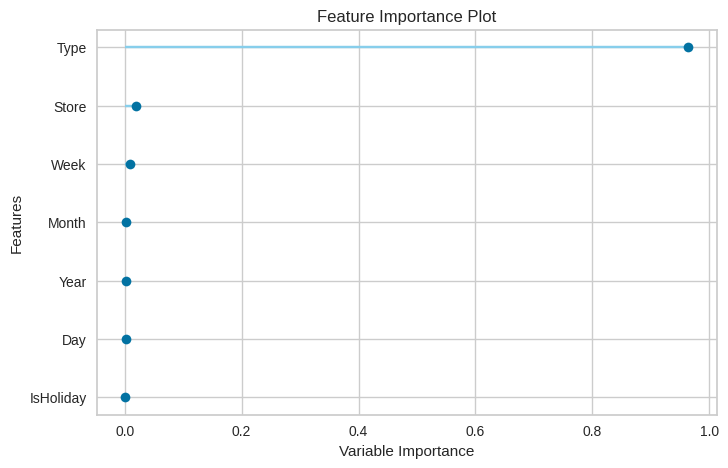

In [ ]:
# plot_model을 이용한 feature importance 시각화
plot_model(top_model, plot = 'feature')